<a href="https://colab.research.google.com/github/samer-glitch/samerelhajjhassan/blob/main/100rows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()


Saving dataset100rows.csv to dataset100rows (1).csv


In [7]:
import pandas as pd
import io

# Load the dataset into a pandas dataframe
df = pd.read_csv(io.BytesIO(uploaded['dataset100rows (1).csv']))


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from mlxtend.plotting import plot_decision_regions

# Load the dataset
df = pd.read_csv('dataset50rows (9).csv')

# Define the criteria function
def label_traffic(row):
    if row['pktTotalCount'] > 500 or row['octetTotalCount'] > 100000:
        return 'malicious'
    elif row['flowDuration'] < 100:
        return 'benign'
    elif row['min_ps'] < 30 or row['max_ps'] > 5555:
        return 'malicious'
    elif row['proto'] not in [10, 15]:
        return 'malicious'
    else:
        return 'benign'

# Apply the labeling function
df['category'] = df.apply(label_traffic, axis=1)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'category' labels
df['category'] = label_encoder.fit_transform(df['category'])

# Define features and labels
X = df[['pktTotalCount', 'octetTotalCount']]
y = df['category']

# Initialize the SVM classifier
model = SVC(kernel='linear')

# Create a pipeline that first applies SMOTE and then fits the SVM model
pipeline = Pipeline([
    ('smote', SMOTE()),
    ('model', model)
])

# Apply cross-validation
accuracy_scores = cross_val_score(pipeline, X, y, cv=2, scoring='accuracy')

# Print evaluation metrics
print("Cross-validated Accuracy Scores:", accuracy_scores)
print("Mean Accuracy:", np.mean(accuracy_scores))

# Note: The decision boundary plot might not be accurate after applying SMOTE,
# as SMOTE changes the distribution of the training data.


Cross-validated Accuracy Scores: [0.64       0.91666667]
Mean Accuracy: 0.7783333333333333


Random Forest - Accuracy: 0.7366666666666667, F1 Score: 0.7018716577540107
AdaBoost - Accuracy: 0.8591666666666666, F1 Score: 0.8596591738432344
Gradient Boosting - Accuracy: 0.8175, F1 Score: 0.8148601398601398


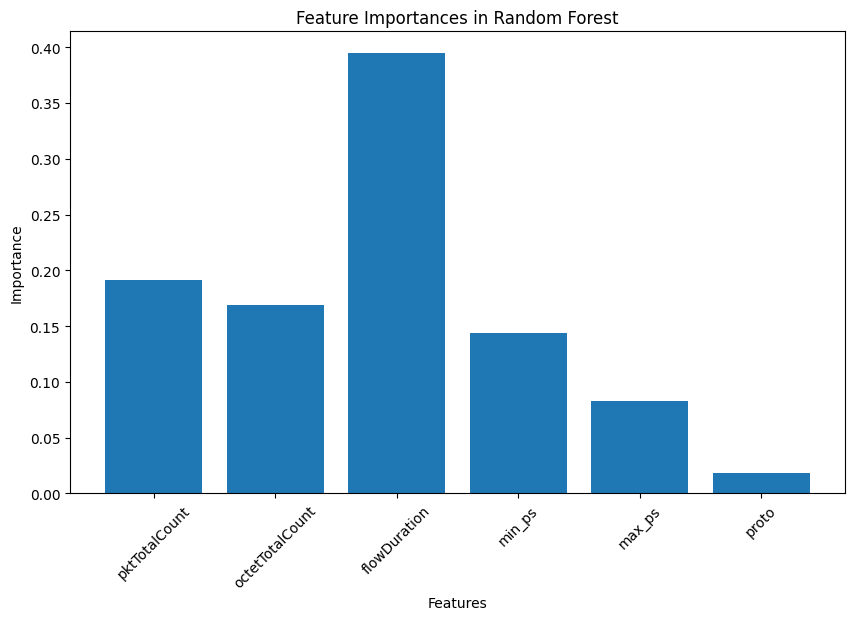

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

# Load the dataset
df = pd.read_csv('dataset50rows (9).csv')

# Define the criteria function for labeling
def label_traffic(row):
    if row['pktTotalCount'] > 500 or row['octetTotalCount'] > 100000:
        return 'malicious'
    elif row['flowDuration'] < 100:
        return 'benign'
    elif row['min_ps'] < 30 or row['max_ps'] > 5555:
        return 'malicious'
    elif row['proto'] not in [10, 15]:
        return 'malicious'
    else:
        return 'benign'

# Apply the labeling function
df['category'] = df.apply(label_traffic, axis=1)

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'category' labels
df['category'] = label_encoder.fit_transform(df['category'])

# Define features and labels
X = df[['pktTotalCount', 'octetTotalCount', 'flowDuration', 'min_ps', 'max_ps', 'proto']]
y = df['category']

# Hyperparameter grids
rf_param_grid = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [None, 10]
}

ada_param_grid = {
    'model__n_estimators': [50, 100],
    'model__learning_rate': [0.01, 0.1]
}

gb_param_grid = {
    'model__n_estimators': [50, 100],
    'model__learning_rate': [0.01, 0.1],
    'model__max_depth': [3, 5]
}

# Models
rf_model = RandomForestClassifier(random_state=0)
ada_model = AdaBoostClassifier(random_state=0)
gb_model = GradientBoostingClassifier(random_state=0)

# Pipelines
rf_pipeline = Pipeline([('smote', SMOTE()), ('model', rf_model)])
ada_pipeline = Pipeline([('smote', SMOTE()), ('model', ada_model)])
gb_pipeline = Pipeline([('smote', SMOTE()), ('model', gb_model)])

# GridSearchCV
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=2, scoring='accuracy')
ada_grid_search = GridSearchCV(ada_pipeline, ada_param_grid, cv=2, scoring='accuracy')
gb_grid_search = GridSearchCV(gb_pipeline, gb_param_grid, cv=2, scoring='accuracy')

# Fit the models
rf_grid_search.fit(X, y)
ada_grid_search.fit(X, y)
gb_grid_search.fit(X, y)

# Best models
best_rf_model = rf_grid_search.best_estimator_
best_ada_model = ada_grid_search.best_estimator_
best_gb_model = gb_grid_search.best_estimator_

# Evaluate and print results
for name, model in [('Random Forest', best_rf_model), ('AdaBoost', best_ada_model), ('Gradient Boosting', best_gb_model)]:
    accuracy = cross_val_score(model, X, y, cv=2, scoring='accuracy').mean()
    f1 = cross_val_score(model, X, y, cv=2, scoring='f1_weighted').mean()
    print(f'{name} - Accuracy: {accuracy}, F1 Score: {f1}')

# Plotting feature importances for Random Forest
plt.figure(figsize=(10, 6))
plt.title("Feature Importances in Random Forest")
plt.bar(range(X.shape[1]), best_rf_model.named_steps['model'].feature_importances_)
plt.xticks(range(X.shape[1]), X.columns, rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()
